<a href="https://colab.research.google.com/github/ersimbu89/AIMLProjects/blob/master/0310_CV1_Silambarasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the libraries, load dataset, print shape of data, visualize the images in dataset.**

In [247]:
# Importing Libraries

import pandas as pd
import numpy as np

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense ,Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from scipy.ndimage.filters import gaussian_filter

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


import cv2
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Suppress scientific notation in numpy outputs
np.set_printoptions(suppress=True)

In [248]:
# Reading the files

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
Images=np.load('/content/drive/MyDrive/Colab Notebooks/images.npy')
Labels=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Labels.csv")

Mounted at /content/drive


In [249]:
# Images file -  Shape

Images.shape

(4750, 128, 128, 3)

**Inferences:**
  

1.   Number of images in file =4750
2.   The size of each image is 128x128 pixels
3.   Each image has 3 color channels(Red, Green , Blue(RGB))


In [250]:
# Labels file - Shape

print("Number of rows in Labels file is "+ str(Labels.shape[0]))
print("Number of columns in Labels file is "+ str(Labels.shape[1]))

Number of rows in Labels file is 4750
Number of columns in Labels file is 1


In [251]:
# # Get the column names, number of non-null values and data-type

Labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


Inference: No Null Value exist in Label dataframe and all are object data type

In [254]:
# Number of unique species

print("Number of unique plant species")
Labels.apply(lambda x: (x.nunique()))

Number of unique plant species


Label    12
dtype: int64

In [253]:
# Finding the distribution among species

Labels['Label'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

 Unique Label and %
Loose Silky-bent             13.768421
Common Chickweed             12.863158
Scentless Mayweed            10.863158
Small-flowered Cranesbill    10.442105
Fat Hen                      10.000000
Charlock                      8.210526
Sugar beet                    8.105263
Cleavers                      6.042105
Black-grass                   5.536842
Shepherds Purse               4.863158
Common wheat                  4.652632
Maize                         4.652632
Name: Label, dtype: float64


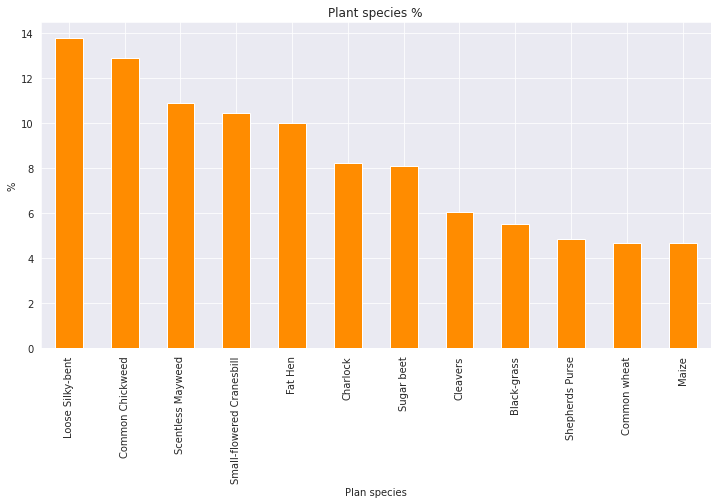

In [252]:
# Determining % of distribution and plotting the graph

print(" Unique Label and %")
print(Labels['Label'].value_counts()/len(Labels)*100)
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
plt.title('Plant species %')
plt.xlabel('Plan species')
plt.ylabel('%')
(Labels['Label'].value_counts()/ len(Labels)*100).plot.bar(color='darkorange');

**Inference:**Data is not equally distributed among all species

 Sample Original Images 



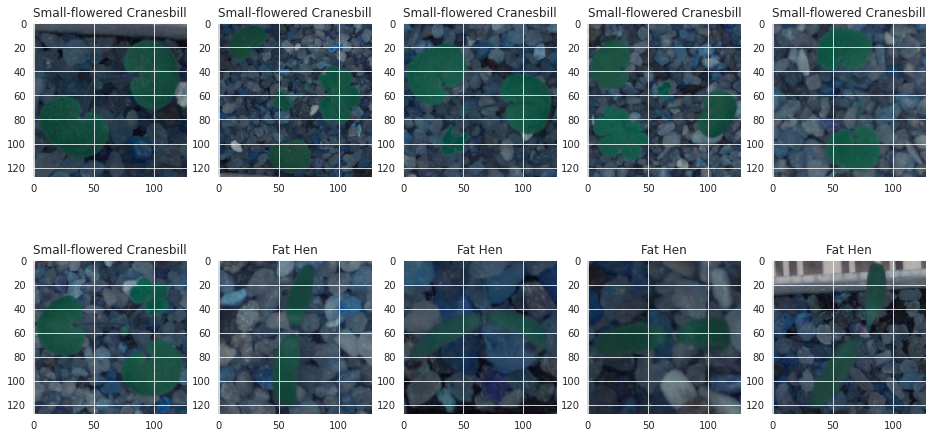

In [255]:
# Visualising the  images available in the index range from 490 to 499
# Displaying label and image


plt.figure(figsize=(16,8), facecolor='white')
plotnumber=1
print(" Sample Original Images \n")
for i in range(490,500):
  label=Labels.values
  image = Images[i] 
  lab=label[i][0]
  ax = plt.subplot(2,5,plotnumber)
  plt.title(lab)
  plt.imshow(Images[i])
  plotnumber+=1
plt.show()
  
 
  

In [213]:
# Gaussian Blurring

X_blur=[]
length=len(Images)
for i in range(length):
  Gaussian = cv2.GaussianBlur(Images[i], (3, 3),4)
  X_blur.append(Gaussian)
X_blur=np.array(X_blur)
print(X_blur.shape)

(4750, 128, 128, 3)


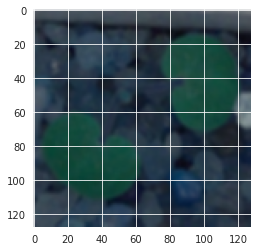

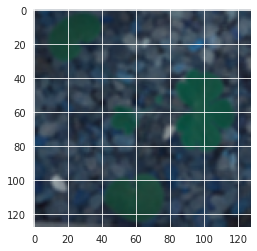

In [257]:
# Visualise the Image after gaussian blurring
plt.imshow(X_blur[490])
plt.show()
plt.imshow(X_blur[491])

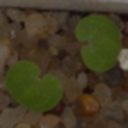

In [258]:
cv2_imshow(X_blur[490])

**Data Pre-processing**:

In [259]:
# Creating X - copy of blured images
# Convert data type of X to float
# Normalise the data and get the shape

X = X_blur.copy()
X = X.astype('float32') 
X /= 255.0 
X.shape


(4750, 128, 128, 3)

In [260]:
# Converting categorical variable into numerical variable
# Define Target class variable
# Displaying label for Y[0]

Labels['Label']=Labels['Label'].replace(["Loose Silky-bent","Common Chickweed","Scentless Mayweed","Small-flowered Cranesbill","Fat Hen","Charlock","Sugar beet","Cleavers","Black-grass","Shepherds Purse","Maize","Common wheat"],["0","1","2","3","4","5","6","7","8","9","10","11"])
y=Labels
y.loc[[0]]

,Label
0,3


In [261]:
# Binary class conversion
# Displaying y[0]

y = keras.utils.to_categorical(y, 12)

In [262]:
# Display y[0]
y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [263]:
X.shape

(4750, 128, 128, 3)

In [264]:
y.shape

(4750, 12)

In [ ]:
#Reshape is not needed

In [265]:
# Split the dataset into training and testing set -70% and 30% respectively
# Further split the  test data set into validation set and test set - 50% and 50%
# Target class variable is unbalanced. Stratify  is used to avoid inaccurate evaluation of model set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0,stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=0,stratify=y_test)


In [266]:
#  Images - Data shape in Train, Test and validation sets
print("Training set - Images shape")
print(X_train.shape)
print(" \n Validation set - Images shape")
print(X_val.shape)
print(" \n Testing set - Images shape")
print(X_test.shape)

Training set - Images shape
(3325, 128, 128, 3)
 
 Validation set - Images shape
(713, 128, 128, 3)
 
 Testing set - Images shape
(712, 128, 128, 3)


In [267]:
#  Labels - Data shape in Train, Test and validation sets

print("Training set - Labels shape")
print(y_train.shape)
print(" \n Validation set - Labels shape")
print(y_val.shape)
print(" \n Testing set - Labels shape")
print(y_test.shape)

Training set - Labels shape
(3325, 12)
 
 Validation set - Labels shape
(713, 12)
 
 Testing set - Labels shape
(712, 12)


In [268]:
# Displaying y_train[0]
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

**Building CNN**

a. Define layers.


*   Convolutional input layer, 16 feature maps with a size of 3x3 and a rectifier activation function
*   Max Pool layer with size 2
*   Dropout layer at 10%
______________________________________________________
*  Convolutional input layer, 32 feature maps with a size of 3x3 and a rectifier activation function
*   Convolutional layer, 32 feature maps with a size of 3x3 and a rectifier activation function
*   Max Pool layer with size 2
*   Dropout layer at 10%
________________________________________________________
*  Convolutional input layer, 64 feature maps with a size of 3x3 and a rectifier activation function
*   Convolutional layer, 64 feature maps with a size of 3x3 and a rectifier activation function
*   Max Pool layer with size 2
*   Dropout layer at 10%
________________________________________________________
*  Convolutional input layer, 128 feature maps with a size of 3×3 and a rectifier activation function
*   Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function
*   Max Pool layer with size 2
*   Dropout layer at 10%
________________________________________________________
*   GlobalAverage pooling layer
*   Flatten layer
________________________________________________________
*   Fully connected layer with 256 units and a rectifier activation function
*   Dropout layer at 10%
*    Fully connected output layer with 12 classes and a softmax activation function
________________________________________________________



In [269]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense ,Input
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(10)

model= Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu',input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

model.add(GlobalAveragePooling2D())
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(12,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0

In [270]:
# compile model

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [271]:
# Add constraints and record best weights 

callbacks = [
    EarlyStopping(
        monitor='val_loss',             # Monitor validation loss history
        min_delta=0.001,                # Stop training when validation loss is no longer improving by at least 0.001
        patience=10,                    # Look at validation loss improvement over the last 10 epochs
        verbose=1), 
    
    ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks//bsweightpspeciess.h5',
       monitor='val_loss',
       verbose=1,
       save_best_only=True,
       save_weights_only=True,
       mode='auto')
]

In [272]:
# fit the model

Results= model.fit(X_train, y_train, callbacks=callbacks,
         epochs = 30,
         batch_size=40,
         validation_data = (X_val, y_val),
         verbose = 1
         )


Epoch 1/30
84/84 [==============================] - 3s 29ms/step - loss: 2.4541 - accuracy: 0.1182 - val_loss: 2.4194 - val_accuracy: 0.1374

Epoch 00001: val_loss improved from inf to 2.41938, saving model to /content/drive/MyDrive/Colab Notebooks/bsweightpspeciess.h5
Epoch 2/30
84/84 [==============================] - 2s 26ms/step - loss: 2.4120 - accuracy: 0.1528 - val_loss: 2.4189 - val_accuracy: 0.1290

Epoch 00002: val_loss improved from 2.41938 to 2.41891, saving model to /content/drive/MyDrive/Colab Notebooks/bsweightpspeciess.h5
Epoch 3/30
84/84 [==============================] - 2s 26ms/step - loss: 2.4215 - accuracy: 0.1337 - val_loss: 2.4115 - val_accuracy: 0.1290

Epoch 00003: val_loss improved from 2.41891 to 2.41151, saving model to /content/drive/MyDrive/Colab Notebooks/bsweightpspeciess.h5
Epoch 4/30
84/84 [==============================] - 2s 26ms/step - loss: 2.4032 - accuracy: 0.1336 - val_loss: 2.3014 - val_accuracy: 0.1753

Epoch 00004: val_loss improved from 2.41

To improve the accuracy and reduce the loss, let's introduce the below additional steps:

*   USE callbacks tf.keras.callbacks.ReduceLROnPlateau when no improvement is seen for a 'patience' number of epochs, then reduce the learning rate

*   Introduce the Data Augmentation to artificially create new training data from existing training data

*   Change the epoch

*   Introduce the steps_per_epoch






In [229]:
# Reduce learning rate when a metric has stopped improving
# Callback monitor. if no improvement is seen for a 'patience' number of epochs, then reduce the learning rate

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)



In [274]:
DataAugmentation = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # ZCA whitening
        rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Zoom the image randomly 
        shear_range = 0.2,
        width_shift_range=0.1,  # randomly shift images horizontally 
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=True,  # flip images randomly
        vertical_flip=False)  # flip images randomly

DataAugmentation.fit(X_train)

In [275]:
# Add constraints and record best weights

callbacks = [
    EarlyStopping(
        monitor='val_loss',             # Monitor validation loss history
        min_delta=0.001,                # Stop training when validation loss is no longer improving by at least 0.001
        patience=10,                    # Look at validation loss improvement over the last 3 epochs
        verbose=1), 
    
    ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks//bestweightsps_augment.h5',
       monitor='val_loss',
       verbose=1,
       save_best_only=True,
       save_weights_only=True,
       mode='auto')
]

In [276]:
# fit the model with Data Augmentation

Results = model.fit_generator(DataAugmentation.flow(X_train,y_train,batch_size=40),epochs = 20, validation_data = (X_val,y_val),
                              verbose = 1, steps_per_epoch=int(3325/40),
                              callbacks=[learning_rate_reduction, callbacks])

Epoch 1/20
83/83 [==============================] - 13s 146ms/step - loss: 0.5288 - accuracy: 0.8170 - val_loss: 0.4327 - val_accuracy: 0.8569

Epoch 00001: val_loss improved from inf to 0.43272, saving model to /content/drive/MyDrive/Colab Notebooks/bestweightsps_augment.h5
Epoch 2/20
83/83 [==============================] - 12s 147ms/step - loss: 0.5222 - accuracy: 0.8164 - val_loss: 0.4656 - val_accuracy: 0.8373

Epoch 00002: val_loss did not improve from 0.43272
Epoch 3/20
83/83 [==============================] - 12s 147ms/step - loss: 0.4560 - accuracy: 0.8335 - val_loss: 0.4618 - val_accuracy: 0.8499

Epoch 00003: val_loss did not improve from 0.43272
Epoch 4/20
83/83 [==============================] - 12s 148ms/step - loss: 0.4537 - accuracy: 0.8326 - val_loss: 0.4348 - val_accuracy: 0.8640

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00004: val_loss did not improve from 0.43272
Epoch 5/20
83/83 [==============================] - 12s 14

In [302]:
# Evaluating Accuracy and loss for Training set

model.load_weights('/content/drive/MyDrive/Colab Notebooks//bestweightsps_augment.h5')
Training_Accuracy=model.evaluate(x=X_train,y=y_train,batch_size=40)
print("Model loss for Training set: {} , Accuracy Model for Training set :{} ".format(Training_Accuracy[0],Training_Accuracy[1]))

84/84 [==============================] - 1s 9ms/step - loss: 0.1463 - accuracy: 0.9453
Model loss for Training set: 0.1463330090045929 , Accuracy Model for Training set :0.945263147354126 


**Evaluating Model using Validation set**

In [278]:
# Validation set - Accuracy and Loss

model.load_weights('/content/drive/MyDrive/Colab Notebooks//bestweightsps_augment.h5')
Validation_Accuracy=model.evaluate(x=X_val,y=y_val,batch_size=40)
print("Model loss for validation set: {} , Accuracy Model for validation set :{} ".format(Validation_Accuracy[0],Validation_Accuracy[1]))

18/18 [==============================] - 0s 11ms/step - loss: 0.3085 - accuracy: 0.9032
Model loss for validation set: 0.30854740738868713 , Accuracy Model for validation set :0.9032257795333862 


In [282]:
def one_hot_to_dense(labels_one_hot):
    num_labels = labels_one_hot.shape[0]
    num_classes = labels_one_hot.shape[1]
    labels_dense = np.where(labels_one_hot == 1)[1]      
    return labels_dense

In [283]:
# Validation set - Predictions 

y_val_predict = model.predict_classes(X_val)
report=classification_report(one_hot_to_dense(y_val),y_val_predict)
print(report)



              precision    recall  f1-score   support

           0       0.83      0.92      0.87        98
           1       0.93      0.97      0.95        92
           2       0.90      0.99      0.94        78
           3       0.96      0.96      0.96        75
           4       0.95      0.88      0.91        72
           5       0.92      0.93      0.92        58
           6       0.95      0.90      0.92        58
           7       0.95      0.81      0.88        43
           8       0.74      0.51      0.61        39
           9       0.82      0.82      0.82        34
          10       0.94      0.97      0.96        33
          11       0.91      0.97      0.94        33

    accuracy                           0.90       713
   macro avg       0.90      0.89      0.89       713
weighted avg       0.90      0.90      0.90       713



In [284]:
species = ["Loose Silky-bent","Common Chickweed","Scentless Mayweed","Small-flowered Cranesbill","Fat Hen","Charlock","Sugar beet","Cleavers","Black-grass","Shepherds Purse","Maize","Common wheat"]
num_species = len(species)
abbreviation = ['LSB', 'CC', 'SM', 'SFC', 'FH', 'C', 'SB', 'CL', 'BG', 'SP', 'M', 'CW']
pd.DataFrame({'class': species, 'abbreviation': abbreviation})



,class,abbreviation
0,Loose Silky-bent,LSB
1,Common Chickweed,CC
2,Scentless Mayweed,SM
3,Small-flowered Cranesbill,SFC
4,Fat Hen,FH
5,Charlock,C
6,Sugar beet,SB
7,Cleavers,CL
8,Black-grass,BG
9,Shepherds Purse,SP


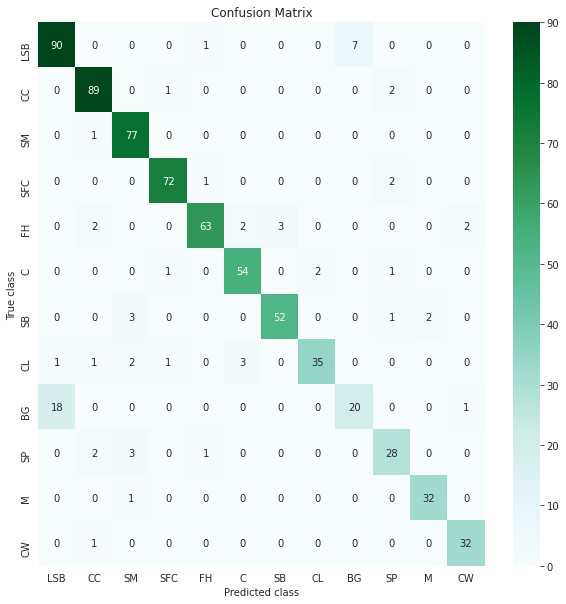

In [285]:
# Confusion matrix for validation set

from sklearn.metrics import confusion_matrix, classification_report
conf_mat= confusion_matrix(one_hot_to_dense(y_val), y_val_predict)
fig, ax = plt.subplots(1,figsize=(10,10))

ax = sns.heatmap(conf_mat, ax=ax, cmap=plt.cm.BuGn, annot=True)
ax.set_xticklabels(abbreviation)
ax.set_yticklabels(abbreviation)
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
fig.savefig('Confusion matrix.png', dpi=300)
plt.show();



**Inference **:
Validation set accuracy and loss are closer to Training set accuracy and loss . Let's evaluate the model using Test set

**Evaluating Model using Test set**

In [286]:
# Evaluating Model Test score

Test_Accuracy=model.evaluate(x=X_test,y=y_test,batch_size=40)
print("Model loss for validation set: {} , Accuracy Model for validation :{} ".format(Test_Accuracy[0],Test_Accuracy[1]))

18/18 [==============================] - 0s 11ms/step - loss: 0.2963 - accuracy: 0.9115
Model loss for validation set: 0.2962932288646698 , Accuracy Model for validation :0.9115168452262878 


In [287]:
# Model - Predicted Values

y_predict = model.predict_classes(X_test)
Test_report=classification_report(one_hot_to_dense(y_test),y_predict)
print(Test_report)


              precision    recall  f1-score   support

           0       0.83      0.93      0.87        98
           1       0.98      0.98      0.98        91
           2       0.87      0.96      0.91        77
           3       1.00      0.95      0.97        74
           4       0.96      0.93      0.94        71
           5       0.88      1.00      0.94        59
           6       0.93      0.95      0.94        58
           7       0.95      0.81      0.88        43
           8       0.70      0.53      0.60        40
           9       1.00      0.77      0.87        35
          10       0.91      0.91      0.91        33
          11       0.94      0.97      0.96        33

    accuracy                           0.91       712
   macro avg       0.91      0.89      0.90       712
weighted avg       0.91      0.91      0.91       712



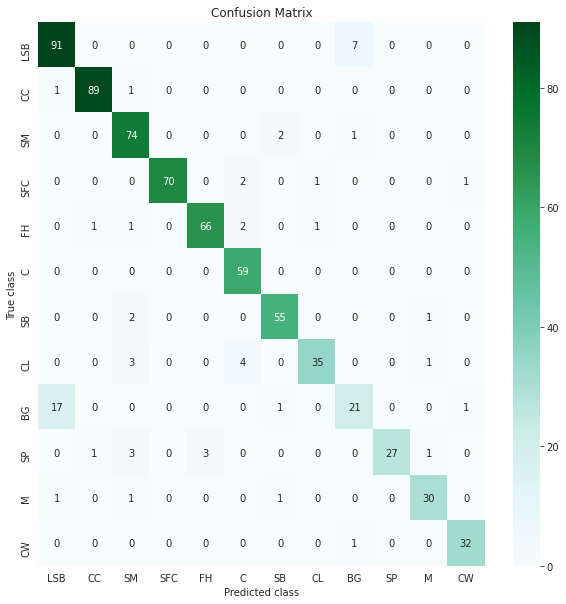

In [288]:
# Model- Confusion Matrix for Test set

from sklearn.metrics import confusion_matrix, classification_report
conf_mat= confusion_matrix(one_hot_to_dense(y_test), y_predict)
fig, ax = plt.subplots(1,figsize=(10,10))

ax = sns.heatmap(conf_mat, ax=ax, cmap=plt.cm.BuGn, annot=True)
ax.set_xticklabels(abbreviation)
ax.set_yticklabels(abbreviation)
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
fig.savefig('Confusion matrix.png', dpi=300)
plt.show();

In [289]:
# Loading the y_test values in new Dataframe called Label

Label= pd.DataFrame(one_hot_to_dense(y_test))
Label

,0
0,3
1,4
2,3
3,3
4,2
...,...
707,0
708,0
709,6
710,11


In [290]:
# Storing the Test set -predicted values in new pandas Series called PredictedValues

PredictedValues=pd.Series(y_predict)
PredictedValues

0       3
1       4
2       3
3       3
4       2
       ..
707     0
708     0
709     6
710    11
711     1
Length: 712, dtype: int64

In [291]:
# Creating Dictionary for mapping ID  and its correspponding label

dict = {0:"Loose Silky-bent",1: "Common Chickweed", 2:"Scentless Mayweed",3:"Small-flowered Cranesbill", 4:"Fat Hen", 5:"Charlock",6:"Sugar beet",7:"Cleavers",8:"Black-grass",9:"Shepherds Purse",10:"Maize",11:"Common wheat"}

In [292]:
# Creating new dataframe called PlantSpeciesName - replica of existing dataframe-Label
PlantSpeciesName = Label.copy()
PlantSpeciesName

,0
0,3
1,4
2,3
3,3
4,2
...,...
707,0
708,0
709,6
710,11


In [293]:
# Adding new column called Name to dataframe

PlantSpeciesName['Name']=Label.replace({0 : dict})
PlantSpeciesName

,0,Name
0,3,Small-flowered Cranesbill
1,4,Fat Hen
2,3,Small-flowered Cranesbill
3,3,Small-flowered Cranesbill
4,2,Scentless Mayweed
...,...,...
707,0,Loose Silky-bent
708,0,Loose Silky-bent
709,6,Sugar beet
710,11,Common wheat


In [308]:
# Rename the column Name

PlantSpeciesName = PlantSpeciesName.rename(columns = {0:'ActualValue-LabelID'})
PlantSpeciesName = PlantSpeciesName.rename(columns = {'Name':'Plant Species Name'})


In [295]:
PlantSpeciesName['PredictedValue-LabelID']=PredictedValues

In [309]:
# Displaying Dataframe -  Actual vs Predicted value of test set

PlantSpeciesName

,ActualValue-LabelID,Plant Species Name,PredictedValue-LabelID
0,3,Small-flowered Cranesbill,3
1,4,Fat Hen,4
2,3,Small-flowered Cranesbill,3
3,3,Small-flowered Cranesbill,3
4,2,Scentless Mayweed,2
...,...,...,...
707,0,Loose Silky-bent,0
708,0,Loose Silky-bent,0
709,6,Sugar beet,6
710,11,Common wheat,11


X_test[2] Image =


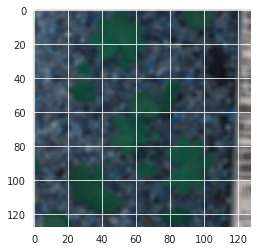



Actual Vs Predicted value for X_test[2] 



,ActualValue-LabelID,Plant Species Name,PredictedValue-LabelID
2,3,Small-flowered Cranesbill,3


In [310]:
# Results for X_test[2]-Predicted Vs Actual

print("X_test[2] Image =")
plt.imshow(X_test[2])
plt.show()
print("\n")
print("Actual Vs Predicted value for X_test[2] \n")

PlantSpeciesName.loc[[2]]


**Inference:** Predicted value matches with Actual value. Image of Small-flowered Cranesbill plant is available in X_test[2]

X_test[3] Image =


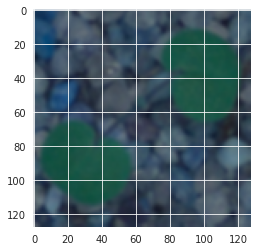



Actual Vs Predicted value for X_test[3] 



,ActualValue-LabelID,Plant Species Name,PredictedValue-LabelID
3,3,Small-flowered Cranesbill,3


In [311]:
# Results for X_test[3]-Predicted Vs Actual

print("X_test[3] Image =")
plt.imshow(X_test[3])
plt.show()
print("\n")
print("Actual Vs Predicted value for X_test[3] \n")
PlantSpeciesName.loc[[3]]


**Inference:** Predicted value matches with Actual value. Image of Small-flowered Cranesbill plant is available in X_test[3]

X_test[33] Image =


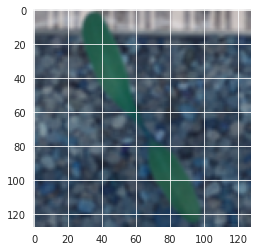



Actual Vs Predicted value for X_test[33] 



,ActualValue-LabelID,Plant Species Name,PredictedValue-LabelID
33,6,Sugar beet,6


In [312]:
# Results for X_test[33]-Predicted Vs Actual

print("X_test[33] Image =")
plt.imshow(X_test[33])
plt.show()
print("\n")
print("Actual Vs Predicted value for X_test[33] \n")
PlantSpeciesName.loc[[33]]

**Inference:** Predicted value matches with Actual value. Image of Sugar beet plant is available in X_test[33]

X_test[36] image =


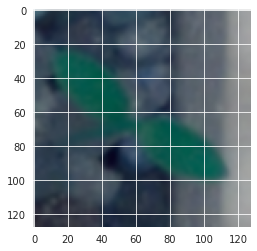



Actual Vs Predicted value for X_test[36]


,ActualValue-LabelID,Plant Species Name,PredictedValue-LabelID
36,1,Common Chickweed,1


In [313]:
# Results for X_test[36]-Predicted Vs Actual

print("X_test[36] image =")
plt.imshow(X_test[36])
plt.show()
print("\n")
print("Actual Vs Predicted value for X_test[36]")
PlantSpeciesName.loc[[36]]

**Inference:** Predicted value matches with Actual value. Image of Common Chickweed plant is available in X_test[36]

X_test[59] Image =


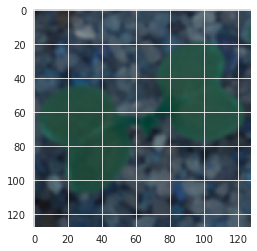



Actual Vs Predicted value for X_test[59]


,ActualValue-LabelID,Plant Species Name,PredictedValue-LabelID
59,5,Charlock,5


In [314]:
# Results for X_test[59]-Predicted Vs Actual

print("X_test[59] Image =")
plt.imshow(X_test[59])
plt.show()
print("\n")
print("Actual Vs Predicted value for X_test[59]")
PlantSpeciesName.loc[[59]]

**Inference:** Predicted value matches with Actual value. Image of Charlock plant is available in X_test[59]